In [86]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import math
import re
from bs4 import BeautifulSoup

#import googleearthplot
import simplekml

import matplotlib.pyplot as plt
%matplotlib inline




In [87]:
!ls July2019/*.csv

July2019/Alkanes_insb8_190701_144056.csv
July2019/Alkanes_insb8_190703_150926.csv
July2019/Alkanes_insb8_190717_162149.csv
July2019/Urgent_P66W_190717_36.csv
July2019/Urgent_P66W_190717_36_old.csv
July2019/Urgent_Tesoro_190701_35.csv
July2019/Urgent_Valero_190703_34.csv


In [88]:
#filename ='July2019/Alkanes_insb8_190701_144056.csv'
#filename='July2019/Alkanes_insb8_190703_150926.csv'
filename='July2019/Urgent_P66W_190717_36.csv'
#filename='July2019/Urgent_Tesoro_190701_35.csv'
#filename='July2019/Urgent_Valero_190703_34.csv'

In [89]:
df = pd.read_csv(filename)

In [90]:
df.head()

,Time,GPSlat,GPSlon,Column (mg/m2),WS (m/s),DIR
0,162149,33.76501,-118.29349,0.7123,0.0,0
1,162151,33.76500,-118.29349,0.5689,0.0,0
2,162153,33.76499,-118.29348,-0.2498,0.0,0
3,162155,33.76499,-118.29346,-0.1685,0.0,0
4,162158,33.76501,-118.29344,0.6541,0.0,0


In [91]:
list(df.columns)

['Time', 'GPSlat', 'GPSlon', 'Column (mg/m2)', 'WS (m/s)', 'DIR']

In [92]:
#df[['(Lon)', '(Lat)', '(conc(Totalextconc))', '(avgc/molec)', '(Totalextflux)']].head(10)

In [93]:
#df[ '(avgc/molec)'] = np.expm1(np.log1p(df[ '(avgc/molec)']))

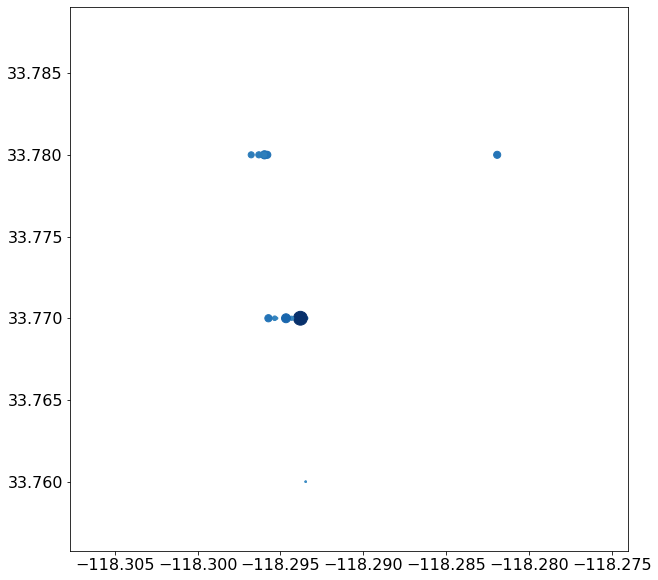

In [94]:
plt.figure(figsize=(10,10))
#plt.scatter(df['(Lon)'], round(df['(Lat)'],2), s=-df['(avgc/molec)']+1, c=-df['(avgc/molec)']+1, cmap='Blues')
plt.scatter(df['GPSlon'], round(df['GPSlat'],2), s=-df['Column (mg/m2)']*10, c=-df['Column (mg/m2)']+1, cmap='Blues')

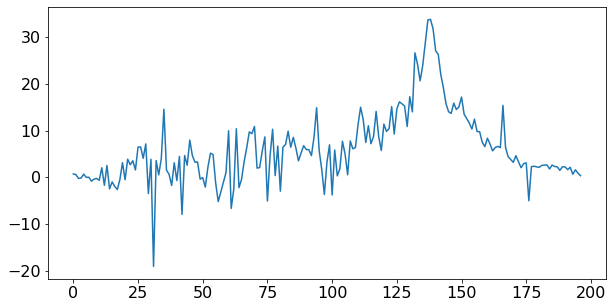

In [95]:
key_to_plot = 'Column (mg/m2)'#'(avgc/molec)'


plt.figure(figsize=(10,5))
plt.plot(df[key_to_plot])
#plt.ylim([-1, 50])

In [96]:
#df[key_to_plot] = df[key_to_plot] + 10
#GPSlat	GPSlon	Column (mg/m2)	

#max_range = 30

import matplotlib
cmap = matplotlib.cm.get_cmap('Blues')


max_values = df[key_to_plot].max()
#max_values = max_range



#max_values = max(df[key_to_plot])
rgba = cmap( max_values)
#print(rgba) # (0.99807766255210428, 0.99923106502084169, 0.74602077638401709, 1.0)
#print(matplotlib.colors.rgb2hex(rgba))


min_offset = 0.0

from polycircles import polycircles
kml = simplekml.Kml()


for row in df.iterrows():
    if np.isnan(row[1][key_to_plot]):
        print('found a nan')
    else:
        if ((row[1][key_to_plot] >= 0) )&( row[1][key_to_plot] < max_values ):
            #print(row[1][key_to_plot])
            
#df['GPSlon'], round(df['GPSlat']            
#            polycircle = polycircles.Polycircle(latitude=row[1]['(Lat)'],
#                                            longitude=row[1]['(Lon)'],
            polycircle = polycircles.Polycircle(latitude=row[1]['GPSlat'],
                                            longitude=row[1]['GPSlon'],  
                                            radius = 20,
#                                            radius=max(10, row[1][key_to_plot]  ),
                                            number_of_vertices=36)
            pol = kml.newpolygon(name="", outerboundaryis=polycircle.to_kml())
            #pol.style.polystyle.color = simplekml.Color.changealphaint(200, simplekml.Color.green)
            
            #alpha= int(round( (row[1][key_to_plot] / max_values) * 255))
            #color_rgba = (row[1][key_to_plot] / max_values) #* 255
            
            color_tuple = cmap( min_offset + (1-min_offset)*( row[1][key_to_plot] / max_values)) 
            #color_tuple = cmap(row[1][key_to_plot] / max_values) 
            color_tuple = [x * 255 for x in color_tuple]

            pol.style.polystyle.color = simplekml.Color.rgb(int(color_tuple[0]), int(color_tuple[1]), int(color_tuple[2]))
            #pol.style.polystyle.color = matplotlib.colors.rgb2hex(rgba)#simplekml.Color.changealphaint(alpha, matplotlib.colors.rgb2hex(rgba))
        #else:
           # print('found  a <= 0')

kml.save("test_kml_polygon_3_manhattan.kml")


# Note: replace 
# 
#    <outline>1</outline> 
#
# with
# 
#   <outline>0</outline>
# 
# in resulting KML file to get rid of white border

In [97]:
simplekml.Color.rgb(int(color_tuple[0]), int(color_tuple[1]), int(color_tuple[2]))

'fffef9f5'

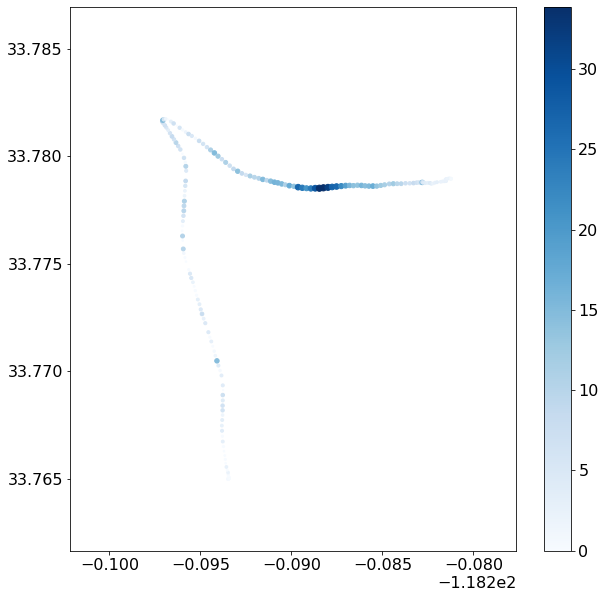

In [98]:
fig, ax = plt.subplots(figsize=(10,10))

params = {
    'axes.labelsize': 16, # fontsize for x and y labels (was 10)
    'axes.titlesize': 16,
    'font.size': 16, # was 10
    'legend.fontsize': 16, # was 10
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'font.family': 'sanserif',    
}
matplotlib.rcParams.update(params)



#plt.scatter(df['(Lon)'], round(df['(Lat)'],2), s=-df['(avgc/molec)']+1, c=-df['(avgc/molec)']+1, cmap='Blues')
#h = ax.scatter(df['GPSlon'], df['GPSlat'], s=(df[key_to_plot] + 5 ), c=(df[key_to_plot]), vmin=0, vmax=120, cmap='Blues')
#plt.get_cmap('Blues')
h = ax.scatter(df['GPSlon'], df['GPSlat'], s=(df[key_to_plot] + 5 ), c=(df[key_to_plot]), vmin=0, cmap='Blues')



#color_tuple = cmap( min_offset + (1-min_offset)*( df[key_to_plot] / max_values)) 
#plt.colorbar(color_tuple)
fig.colorbar(h, ax=ax)

plt.savefig('testfig_for_colorbar')
#ax.legend(handles = h)

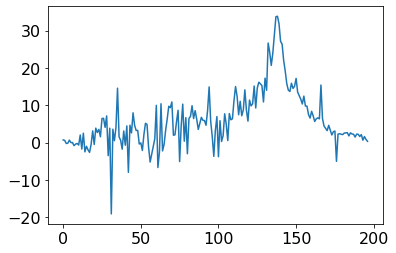

In [99]:
plt.plot(df['Column (mg/m2)'])

In [100]:
color_tuple

[245.4313725490196, 249.99607843137252, 254.49803921568628, 255.0]

In [101]:
color_tuple

[245.4313725490196, 249.99607843137252, 254.49803921568628, 255.0]